In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df_a=pd.read_csv("application_data.csv")
df_p=pd.read_csv("previous_application.csv")

In [ ]:
#knowing the data
print("top 5 rows of data:\n\n",df_a.head(5))

top 5 rows of data:

    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied     

In [ ]:
print("Getting information about column\n\n", df_a.dtypes)

Getting information about column

 SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_

In [ ]:
print("Getting name of all columns: \n\n",df_a.columns)

Getting name of all columns: 

 Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [ ]:
print(f"no. of row:{df_a.shape[0]}\n no. of columns: {df_a.shape[1]}")

no. of row:307511
 no. of columns: 122


In [ ]:
#checking for nan values
(df_a.isna().sum()/len(df_a)*100).sort_values(axis=0)   

SK_ID_CURR                       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0

In [ ]:
print("columns with more than 50% of Nan values \n\n")
na_val=((df_a.isna().sum()/len(df_a))*100).sort_values()>50
print("count of columns:",na_val[na_val.values==True].count(),"\n\n ")
print(na_val[na_val.values==True])

columns with more than 50% of Nan values 


count of columns: 41 

 
HOUSETYPE_MODE              True
LIVINGAREA_AVG              True
LIVINGAREA_MODE             True
LIVINGAREA_MEDI             True
ENTRANCES_AVG               True
ENTRANCES_MODE              True
ENTRANCES_MEDI              True
APARTMENTS_MEDI             True
APARTMENTS_AVG              True
APARTMENTS_MODE             True
WALLSMATERIAL_MODE          True
ELEVATORS_MEDI              True
ELEVATORS_AVG               True
ELEVATORS_MODE              True
NONLIVINGAREA_MODE          True
NONLIVINGAREA_AVG           True
NONLIVINGAREA_MEDI          True
EXT_SOURCE_1                True
BASEMENTAREA_MODE           True
BASEMENTAREA_AVG            True
BASEMENTAREA_MEDI           True
LANDAREA_MEDI               True
LANDAREA_AVG                True
LANDAREA_MODE               True
OWN_CAR_AGE                 True
YEARS_BUILD_MODE            True
YEARS_BUILD_AVG             True
YEARS_BUILD_MEDI            True
FLOORSM

In [ ]:
df_a.shape

(307511, 122)

In [ ]:
df_a.describe().transpose()
#	Target variable 
#1 - client with payment difficulties:he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample,
#0 - all other cases

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


# SUMMARY

1. we have 307511 row and  122 columns

2. 41 columns in dataset are having more than 50% of nan values

3. 8% are the people with payment issue

4. Almost all columns have less standard deviation which means low variance means nearer to mean

5. The data seem to be disbalanced with respect to target variable

if the standard deviation is high that means your data have high variance. And if you compare the mean and 50% percentile (median) you can see the skewness of your numeric variables. From skewness you can infer that your numeric variables have too many outlier or not.


standard deviation----->variance

mean,mode---->skewness

sknewness--->outliers


positively skewed:   mean of the data is greater than the median 

mean=median= mode symmetrical distribution

negatively skewed: mean is less than median


we find skewness of data so that we can transform data in (normal distribution)

In [ ]:
df_a["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

we have 36935 client with cash loan and 3847 with revolving loans

In [ ]:
df_a["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
3299/len(df_a)*100

1.0728071516140885

8% i.e 3299 in the records have payment issue


In [ ]:
df_a["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

We have 2:1 ratio in our records for F:M 

In [ ]:
df_info=df_a[["AMT_INCOME_TOTAL","AMT_CREDIT"]]
df_info["times"]=np.floor(df_a["AMT_CREDIT"]/df_a["AMT_INCOME_TOTAL"])
df_info.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AMT_INCOME_TOTAL,AMT_CREDIT,times
0,202500.0,406597.5,2.0
1,270000.0,1293502.5,4.0
2,67500.0,135000.0,2.0
3,135000.0,312682.5,2.0
4,121500.0,513000.0,4.0


In [ ]:
#Education based defaluters
df_a[df_a["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
#Income type defaluters
df_a[df_a["TARGET"]==1]["NAME_INCOME_TYPE"].value_counts()

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

# Summary



**To see the distribution of contract type**     

      Contract type       Frequency
      Cash loans           36935
      Revolving loans      3847


**8% i.e 3299 in the records have payment issue**

**female to male ratio is 2:1**

F:      202448

M:      105059

**To see income and credit ratio**

	AMT_INCOME_TOTAL	AMT_CREDIT	times

	202500.0	        406597.5	   2.0

	270000.0	        1293502.5	   4.0

	67500.0	          135000.0	   2.0

	135000.0	        312682.5	   2.0

	121500.0	        513000.0	   4.0



**Education based defaluters**

Secondary / secondary special    19524

Higher education                  4009

Incomplete higher                  872

Lower secondary                    417

Academic degree                      3


**Income type defaluters**

Working                 15224

Commercial associate     5360

Pensioner                2982

State servant            1249

Unemployed                  8

Maternity leave             2


**Insights based on gender**

1: Average income of female is less. But despite that fact ratio of female house owners and male owners is same.

2: Female applicants' average employment days before the application is more than the male applicants.

3: 63% of the loans that were applied by the female applicants was approved(same as male applicants).


4: 72% of the women applicants are from region with the rating 2, same as men.

5: Credit and cash offices are most popular channels through which clients were acquired in the previous application which is 
   common for both the genders.

   



In [ ]:
#Dividing the columns into continuous and discreate column
#threshold =30
cont_col=[]
dis_col=[]
for column in df_a.columns:
  if len(df_a[column].unique())>30:
    cont_col.append(column)
  else:
    dis_col.append(column)

#removing the target variable from dis_col
dis_col.remove("TARGET")

In [ ]:
print(f"No of continuous columns:{len(cont_col)} \n No. of discrete columns {len(dis_col)}")

No of continuous columns:58 
 No. of discrete columns 63


In [ ]:
df_p.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"No of rows and columns are:{df_p.shape}" )

No of rows and columns are:(1670214, 37)


In [ ]:
print("Getting information about column\n\n", df_p.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
print("Getting name of all columns: \n\n",df_p.columns)

Getting name of all columns: 

 Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [ ]:
df_p.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


In [ ]:
(df_p.isna().sum()/len(df_p)*100).sort_values()

SK_ID_PREV                      0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_PAYMENT_TYPE               0.000000
AMT_APPLICATION                 0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
AMT_CREDIT                      0.000060
PRODUCT_COMBINATION             0.020716
CNT_PAYMENT                    22.286366
AMT_ANNUITY     

In [ ]:
#correlation between df(application) and df_p(previous application)
col_app=list(df_a.columns)
col_prev=list(df_p.columns)
uni_col=[]
[uni_col.append(col) for col  in col_app if col not in uni_col]
[uni_col.append(col) for col in col_prev if col not in col_app]

uni_col=list(set(uni_col))
    
print(f"List of columns unique in application.csv and previous application:{uni_col}")

List of columns unique in application.csv and previous application:['FLAG_DOCUMENT_19', 'NAME_INCOME_TYPE', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'FLAG_DOCUMENT_7', 'LIVE_CITY_NOT_WORK_CITY', 'NAME_CLIENT_TYPE', 'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_8', 'FONDKAPREMONT_MODE', 'FLAG_DOCUMENT_4', 'APARTMENTS_MODE', 'SK_ID_PREV', 'AMT_GOODS_PRICE', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'FLAG_DOCUMENT_21', 'NONLIVINGAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'NAME_CONTRACT_TYPE', 'NONLIVINGAPARTMENTS_AVG', 'DAYS_LAST_PHONE_CHANGE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'YEARS_BEGINEXPLUATATION_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'CODE_REJECT_REASON', 'YEARS_BUILD_MODE', 'AMT_REQ_CREDIT_BUREAU_MON', 'YEARS_BUILD_AVG', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_12', 'DAYS_FIRST_DUE', 'TARGET', 'APARTMENTS_MEDI', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_20', 'NONLIVINGAREA_AVG', 'ELEVATORS_MEDI', 'DAYS_EMPLOYED', 'REG_REGION_NOT_LIVE_REGION', 'LANDAREA_AVG', 'FLA

In [ ]:
#common columns
common=[]
[common.append(col) for col in col_app if col in col_prev]
common

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START']

In [ ]:
#merging the two dataset
#final_df=pd.merge(df_a, df_p,on='SK_ID_CURR')

In [ ]:
#final_df.head()

In [ ]:
final_df.shape

NameError: ignored

In [ ]:
lst=list(final_df.columns)
len(lst)

In [ ]:
lst.index("SK_ID_PREV")

In [ ]:
col_lst=[]
col_lst.append(lst[122])
col_lst.extend(lst[:122])
col_lst.extend(lst[123:])
col_lst

In [ ]:
len(col_lst)

In [ ]:
df=final_df[col_lst]
df.head()

In [ ]:
df.shape

We have 1413701 rows and 158 columns after merging the data from application.csv and prev_application.

In [ ]:
df["TARGET"].value_counts()

The dataset seems to be disbalanced with respective to target variable.

In [ ]:
#columns with more than 50% nan values
print("columns with more than 50 % of nan values")
nans=((df.isna().sum()/len(df))*100).sort_values()
print("count: ",nans[nans.values>50].count())
nans[nans.values>50]


38 columns with  more than 50%  nan values are dependent on each other in which Rate_interest_Privileged and Rate_interest_Primay with 99% nan value 

In [ ]:
df.describe().transpose()

In [ ]:
#columns which are similar with 2 dataset after merging
import re 
for column in df.columns:
  if re.search(".*_x$",str(column))!=None:
    print(re.search(".*_x$",str(column)).group())



# **SUMMARY**

1. We have 1413701 rows and 158 columns after merging the data from application.csv and prev_application.


2. 38 columns with  more than 50%  nan values are dependent on each other in which Rate_interest_Privileged and Rate_interest_Primay with 99% nan value 

3. We have 8% of defaulter i.e with payment issue according to the target variable.

4. In most of the cases we have low standard deviation which will tell us less variance  and values closer to mean which is good for classification

5. The dataset seems to be disbalanced with respective to target variable (92% 8% split.)

6. positively skewed data in most of our columns

7. Columns which are similar after merging
  
  NAME_CONTRACT_TYPE_x
  
  AMT_CREDIT_x

  AMT_ANNUITY_x

  AMT_GOODS_PRICE_x

  NAME_TYPE_SUITE_x

  WEEKDAY_APPR_PROCESS_START_x

  HOUR_APPR_PROCESS_START_x


8. Duplicate values are present after merging of data.

9. Source of income

    Working                 724089

    Commercial associate    321481

    Pensioner               273544

    State servant            94424

    Unemployed                 123

    Student                     24

    Maternity leave             16

**Create hypothesis if required.**

**Hypothesis are made at the preprocessing and eda state and further they are made more accurate to business problem at the ending stage.**

In [ ]:
df.head()

In [ ]:
sim_df=df[["SK_ID_PREV","SK_ID_CURR","NAME_CONTRACT_TYPE_x","NAME_CONTRACT_TYPE_y",
        "AMT_CREDIT_x","AMT_CREDIT_y","AMT_ANNUITY_x","AMT_ANNUITY_y","AMT_GOODS_PRICE_x","AMT_GOODS_PRICE_y",
        "NAME_TYPE_SUITE_x","NAME_TYPE_SUITE_y","WEEKDAY_APPR_PROCESS_START_y","HOUR_APPR_PROCESS_START_y"]]
sim_df.head(10)



1. Removing duplicate rows values by converting it in single row 
2. Removing duplicate columns values by converting it in single column




Idea for single row

    cur_id    pre_id

    100006     [1564014,2015477,565015]

Idea for single column

    [x,y]

    x---> present

    y--->previous

In [ ]:
#creating a group based on column SK_ID_CURR 
sim_group=sim_df.groupby(by="SK_ID_CURR",sort=True)
#creating simlar column in consideration
similar_list=["SK_ID_PREV","NAME_CONTRACT_TYPE_y","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_y","NAME_TYPE_SUITE_y","WEEKDAY_APPR_PROCESS_START_y","HOUR_APPR_PROCESS_START_y"]
sim_df_list=pd.DataFrame()

for column in similar_list:
  sim_df_list[column[:len(column)-1]+"list"]=sim_group[column].apply(list)

display(sim_df_list.head(5))


**Group by helps us in two ways one is transformation and second is applying aggregate function a group of groups.**

In [ ]:
lst=["SK_ID_PREV","NAME_CONTRACT_TYPE","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","NAME_TYPE_SUITE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START"]
df_p.drop(lst,axis=1,inplace=True)


In [ ]:
display(df_p.head())
df_p.shape

In [ ]:
#merging the list data
#df=pd.merge(df_a,df_p,on="SK_ID_CURR")

#df.head()

In [ ]:
#df.shape

In [ ]:
#df=pd.merge(df,sim_df_list,on="SK_ID_CURR")

In [ ]:
#df.head()

#

In [ ]:
#df.shape

In [ ]:
#save file
#df.head(500000).to_csv("merged_file.csv",header=True)

# **Univariate Analysis**

In [ ]:
df_a.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
print("The percentage of people with no payment diffculty:")  
round((df_a["TARGET"].value_counts()[0]/len(df_a["TARGET"]))*100,2)

The percentage of people with no payment diffculty:


91.93

In [ ]:
print("Major Contract type:")
df_a["NAME_CONTRACT_TYPE"].value_counts()

Major Contract type:


Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
print("we can say that the ratio of female to male is 2:1")
df_a["CODE_GENDER"].value_counts()

we can say that the ratio of female to male is 2:1


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
print("The people not owning a car to owing a car is 2:1")
df_a["FLAG_OWN_CAR"].value_counts()

The people not owning a car to owing a car is 2:1


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
print("The percentage of people owing a house")
round(df_a["FLAG_OWN_REALTY"].value_counts()[0]/len(df_a),2)*100

The percentage of people owing a house


69.0

Distribution of the children
 0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64 




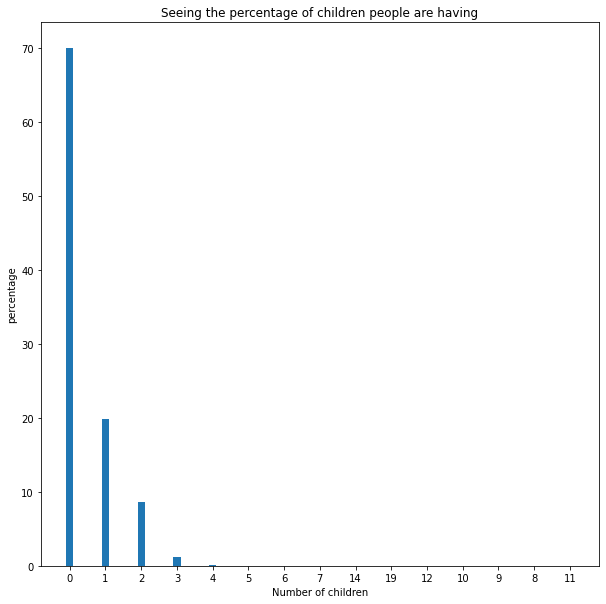

In [ ]:
print("Distribution of the children\n",df_a["CNT_CHILDREN"].value_counts(),"\n\n")

plt.figure(figsize=(10,10))
c=(df_a["CNT_CHILDREN"].value_counts().values/len(df_a["CNT_CHILDREN"]))*100
l=list(df_a["CNT_CHILDREN"].value_counts().index)
l=list(map(str,l))
plt.bar(l,c,width=0.2)
plt.title("Seeing the percentage of children people are having")
plt.ylabel("percentage")
plt.xlabel("Number of children")
plt.show()



More people without children are taking loan.

The ratio is 70:30 

In [ ]:
print("Person with minmum salary")
print(df_a["AMT_INCOME_TOTAL"].min())
print("Person with maximum salary")
print(df_a["AMT_INCOME_TOTAL"].max())
print("The average of salary")
print(round(df_a["AMT_INCOME_TOTAL"].mean(),0))

Person with minmum salary
25650.0
Person with maximum salary
117000000.0
The average of salary
168798.0


In [ ]:
print("Maximum amount credited")
print(df_a["AMT_CREDIT"].max())

print("Average amount credited")
print(round(df_a["AMT_CREDIT"].mean(),0))


Maximum amount credited
4050000.0
Average amount credited
599026.0


In [ ]:
print("Average cost of goods which are taken on credit")
print(round(df_a["AMT_GOODS_PRICE"].mean(),0))


Average cost of goods which are taken on credit
538396.0


In [ ]:
print("Family status of client")
df_a["NAME_TYPE_SUITE"].value_counts()

Family status of client


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
print("Client's income type")
print(df_a["NAME_INCOME_TYPE"].value_counts())

Client's income type
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


Client's education background
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64






([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

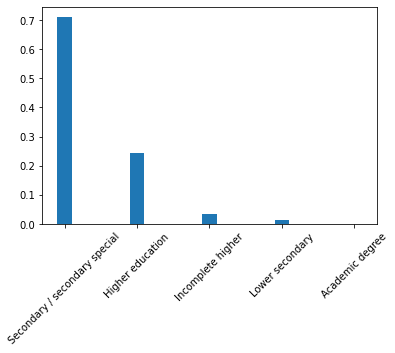

In [ ]:
print("Client's education background")
print(df_a["NAME_EDUCATION_TYPE"].value_counts())
print("\n\n\n")
plt.bar(df_a["NAME_EDUCATION_TYPE"].value_counts().index,df_a["NAME_EDUCATION_TYPE"].value_counts().values/len(df_a["NAME_EDUCATION_TYPE"]),width=0.2)
plt.xticks(rotation=45)

In [ ]:
print("The day of applying loan")
print(df_a["WEEKDAY_APPR_PROCESS_START"].value_counts().sort_values())


The day of applying loan
SUNDAY       16181
SATURDAY     33852
FRIDAY       50338
THURSDAY     50591
MONDAY       50714
WEDNESDAY    51934
TUESDAY      53901
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


Maximum client show up at tuesday and minimum at sunday

In [ ]:
print("The hour of day for applying loan")
print(df_a["HOUR_APPR_PROCESS_START"].value_counts())

The hour of day for applying loan
10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64


In [ ]:
df_p.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("The status of client loan:")
ind=df_p["NAME_CONTRACT_STATUS"].value_counts().index
value=df_p["NAME_CONTRACT_STATUS"].value_counts()/len(df_p["NAME_CONTRACT_STATUS"])*100
[print(element) for element in list(zip(ind,value))]

The status of client loan:
('Approved', 62.074740123121956)
('Canceled', 18.93883059296593)
('Refused', 17.403638096675035)
('Unused offer', 1.5827911872370846)


[None, None, None, None]

In [ ]:
print("How the payment made to client:")
df_p["NAME_PAYMENT_TYPE"].value_counts()

How the payment made to client:


Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [ ]:
print("Rejection reason")
print(df_p["CODE_REJECT_REASON"].value_counts())

Rejection reason
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64


***We need to find xap value as it is important for not approving the loan***

In [ ]:
print("The client type")
df_p["NAME_CLIENT_TYPE"].value_counts()

The client type


Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

we have more repeater client 

In [ ]:
print("client reqesting loan for\n\n")
df_p["NAME_GOODS_CATEGORY"].value_counts()
# clients are majorly applying loan for mobile,consumer electronics,computers

client reqesting loan for




XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [ ]:
df_a.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
threshold=10
cont_col=[]
disc_col=[]
for column in df_a.columns:
  if len(df_a[column].unique())>threshold:
    cont_col.append(column)
  else:
    disc_col.append(column)

print('*'*80)
print(f"continuous columns:\n{cont_col}")
print('*'*80)
print(f" discrete columns:\n {disc_col}")


********************************************************************************
continuous columns:
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE'

In [ ]:
def insight_discrete(column):
  print(f"Percentage with respect to {column}")
  indexs=df_a[column].value_counts().index
  values=round(df_a[column].value_counts()/len(df_a[column]),2)
  [print(element) for element in list(zip(indexs,values))]
  print("\n\n")
  return 0

In [ ]:
for column in disc_col:
  insight_discrete(column)

Percentage with respect to TARGET
(0, 0.92)
(1, 0.08)



Percentage with respect to NAME_CONTRACT_TYPE
('Cash loans', 0.9)
('Revolving loans', 0.1)



Percentage with respect to CODE_GENDER
('F', 0.66)
('M', 0.34)
('XNA', 0.0)



Percentage with respect to FLAG_OWN_CAR
('N', 0.66)
('Y', 0.34)



Percentage with respect to FLAG_OWN_REALTY
('Y', 0.69)
('N', 0.31)



Percentage with respect to NAME_TYPE_SUITE
('Unaccompanied', 0.81)
('Family', 0.13)
('Spouse, partner', 0.04)
('Children', 0.01)
('Other_B', 0.01)
('Other_A', 0.0)
('Group of people', 0.0)



Percentage with respect to NAME_INCOME_TYPE
('Working', 0.52)
('Commercial associate', 0.23)
('Pensioner', 0.18)
('State servant', 0.07)
('Unemployed', 0.0)
('Student', 0.0)
('Businessman', 0.0)
('Maternity leave', 0.0)



Percentage with respect to NAME_EDUCATION_TYPE
('Secondary / secondary special', 0.71)
('Higher education', 0.24)
('Incomplete higher', 0.03)
('Lower secondary', 0.01)
('Academic degree', 0.0)



Percentage with respec

In [ ]:
#knowing the distribution for continuous variables
def insight_continuous(column):
 
  plt.hist(df_a[column].dropna())
  plt.title(f"histogram for {column}")
  plt.xlabel(column)
  plt.ylabel("frequency")
  plt.show()
  print('\n\n')
  return 0

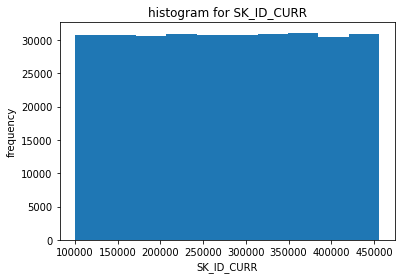

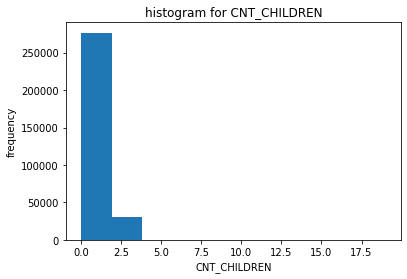

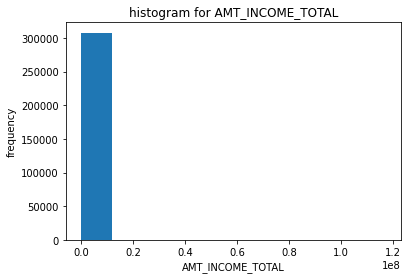

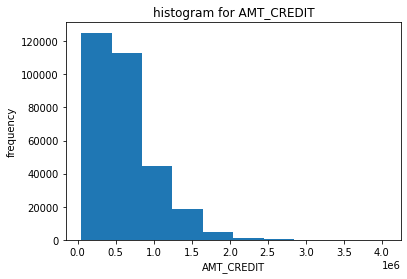

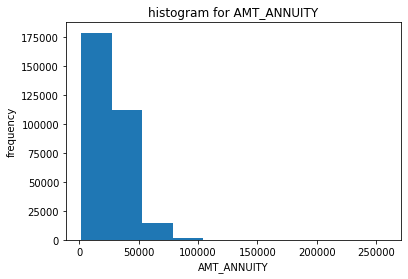

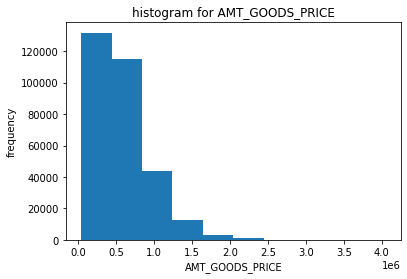

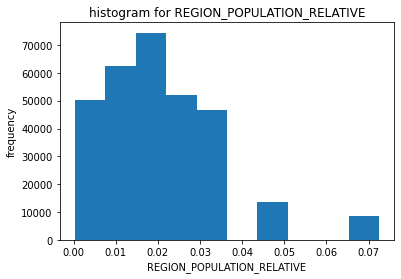

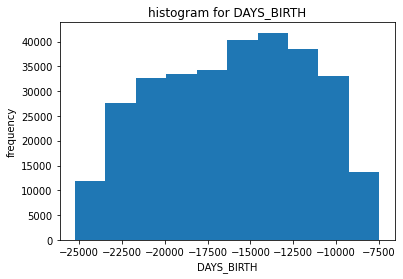

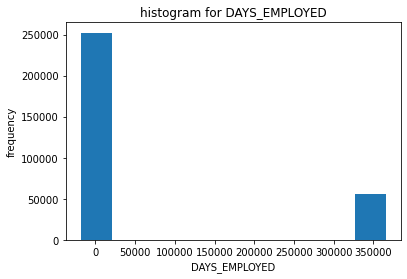

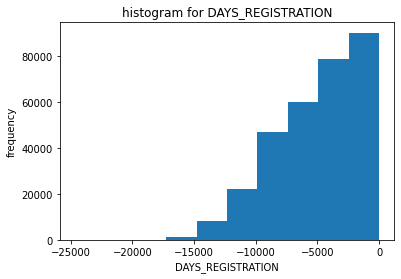

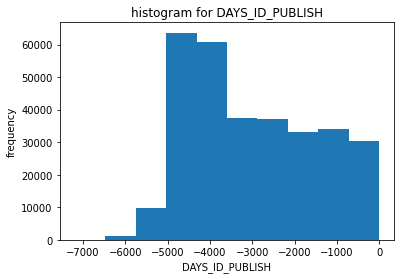

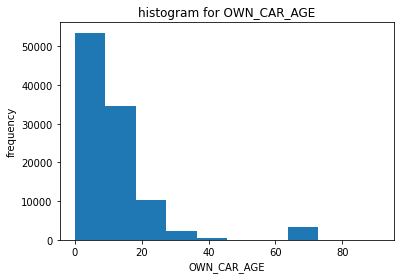

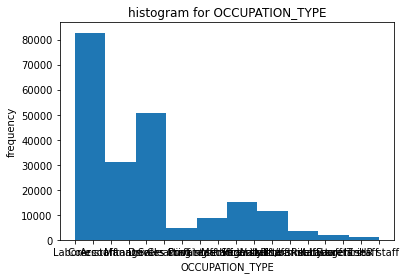

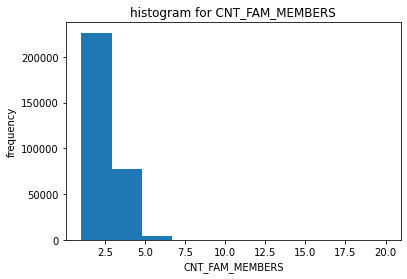

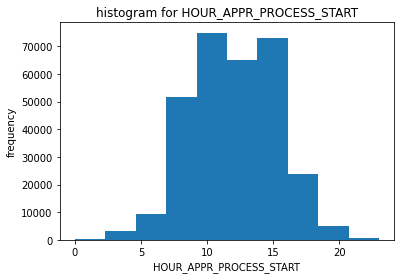

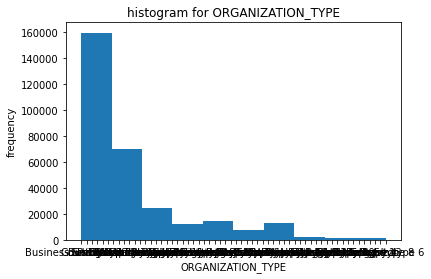

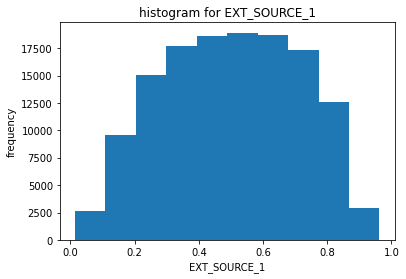

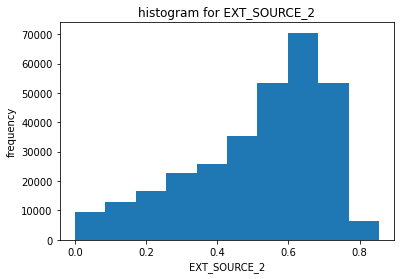

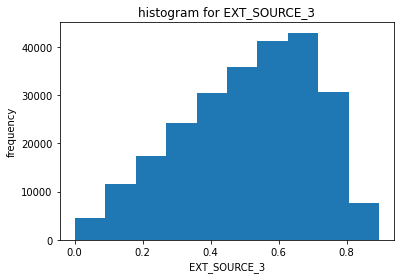

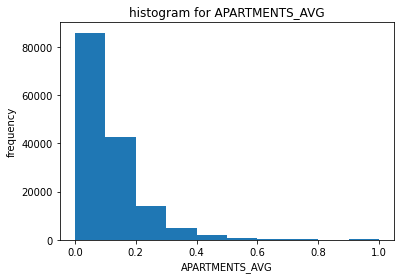

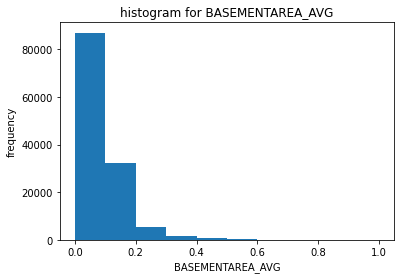

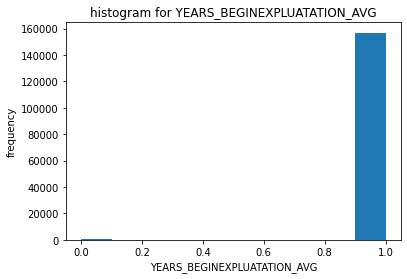

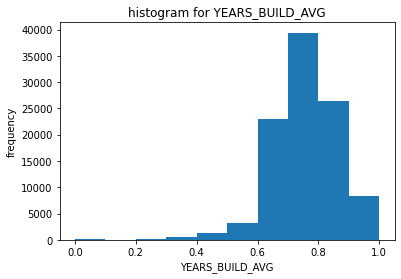

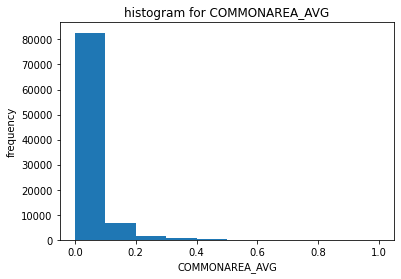

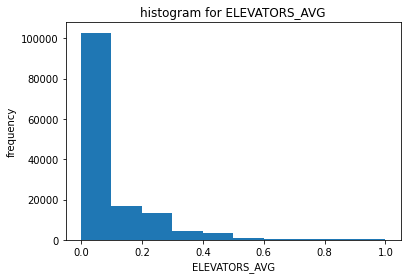

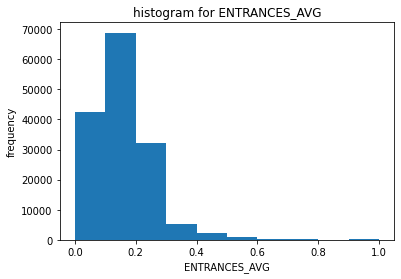

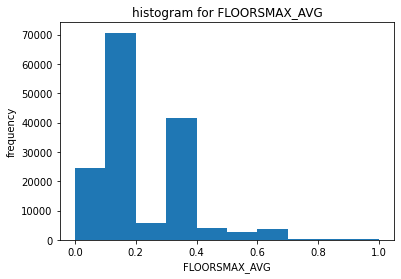

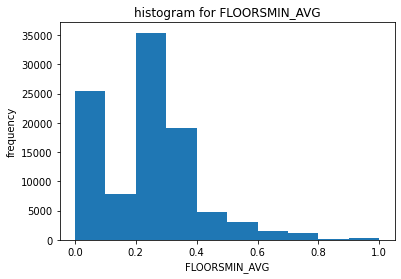

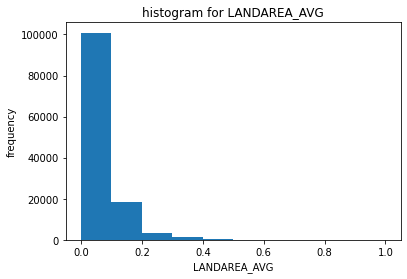

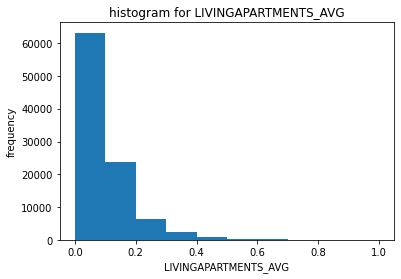

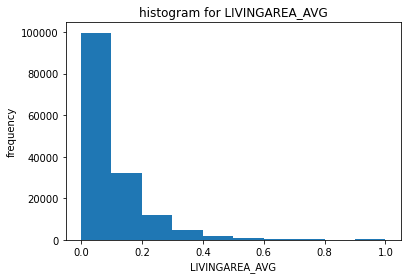

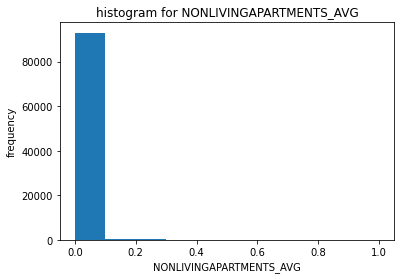

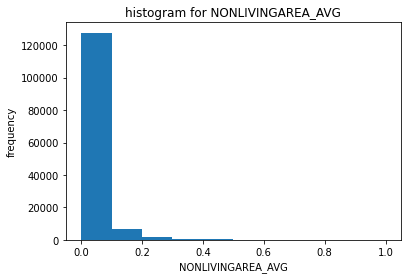

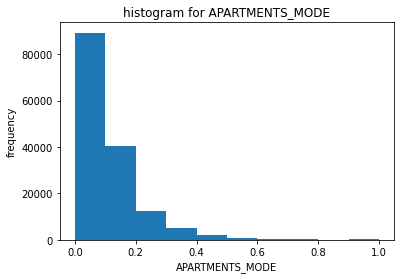

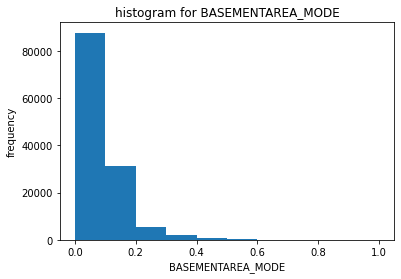

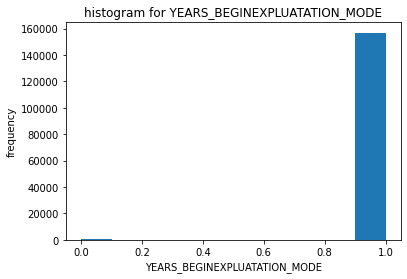

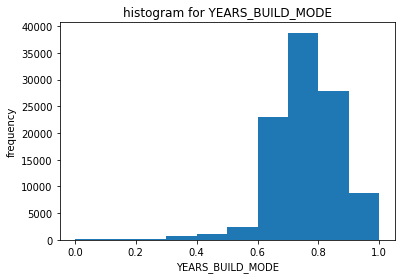

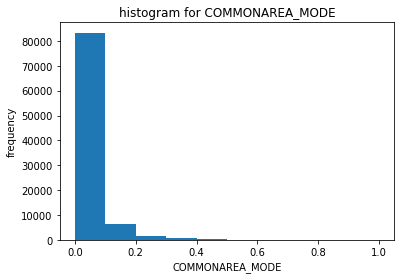

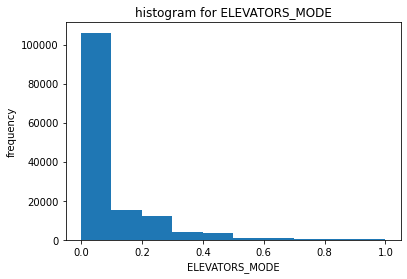

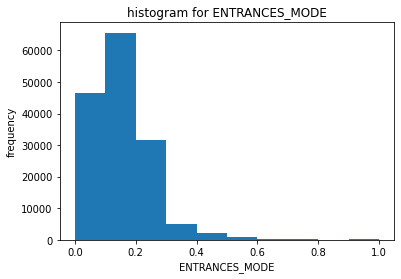

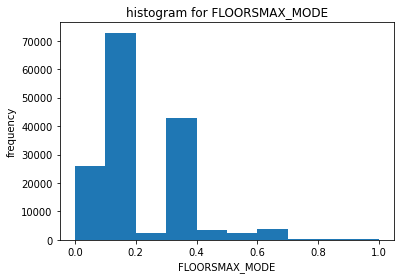

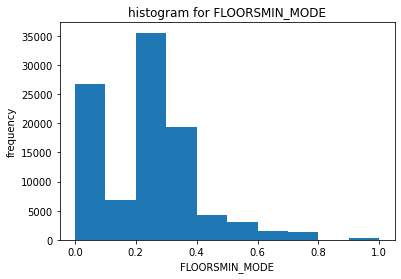

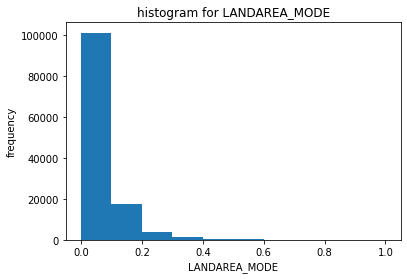

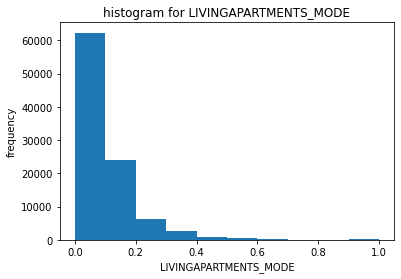

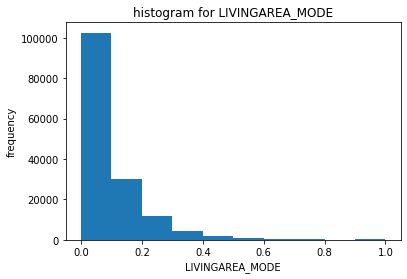

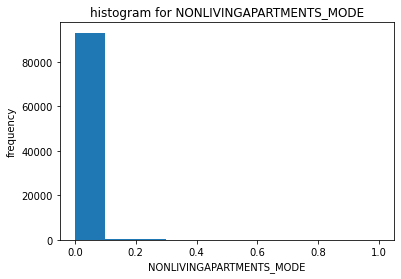

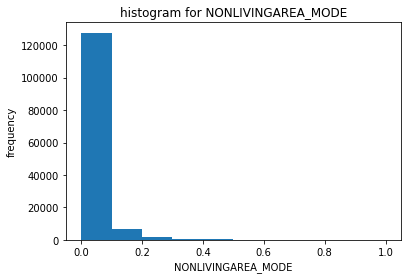

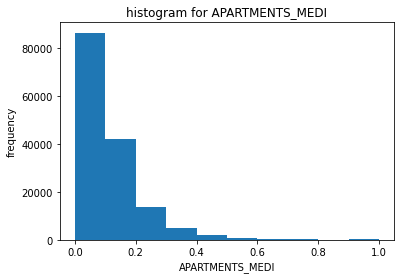

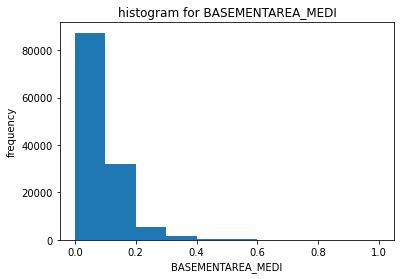

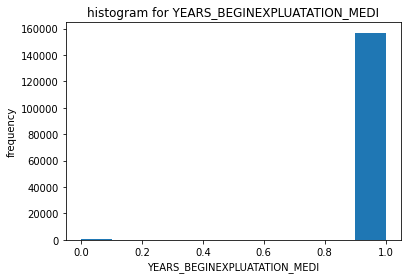

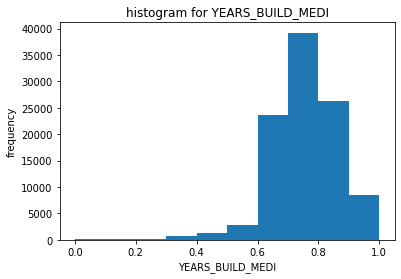

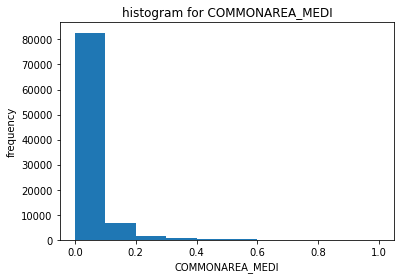

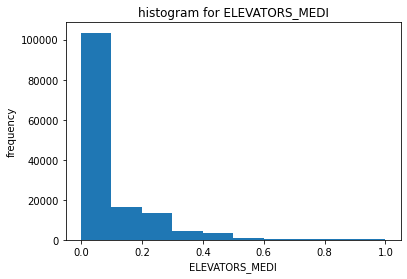

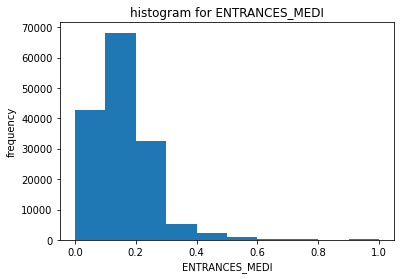

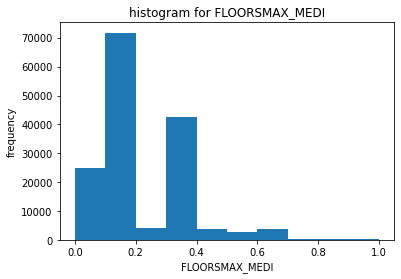

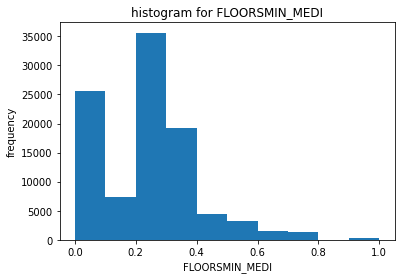

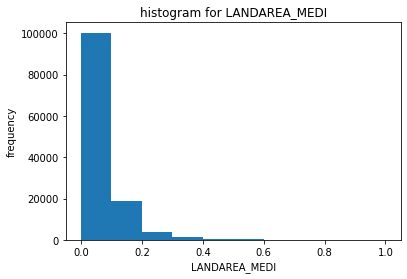

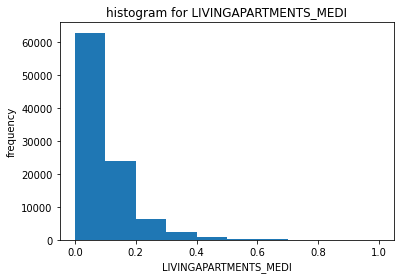

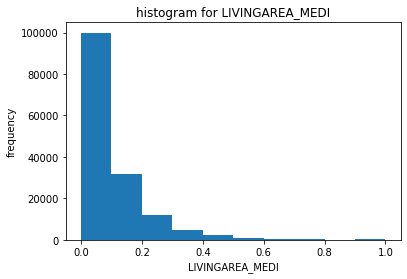

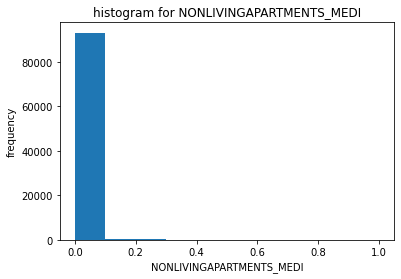

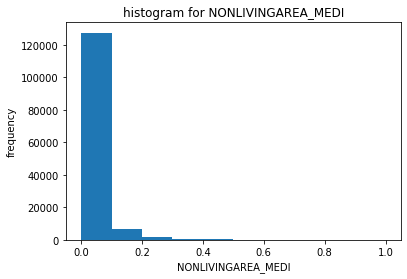

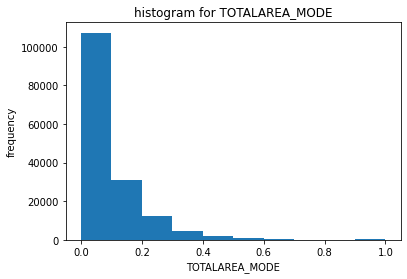

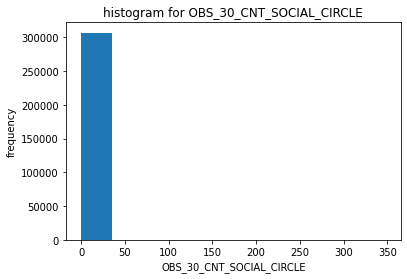

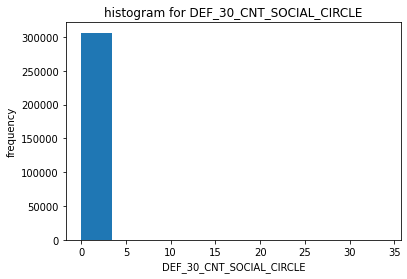

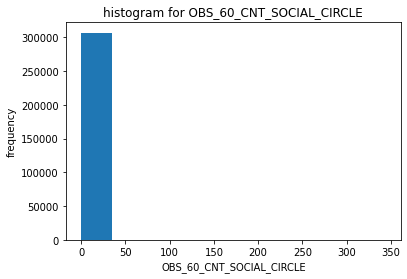

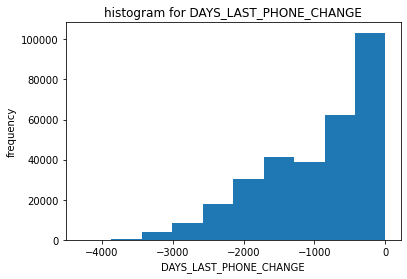

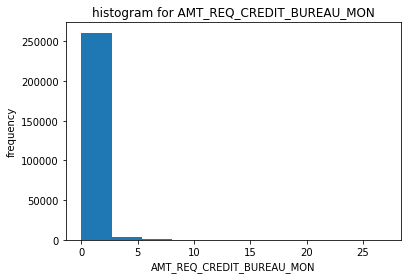

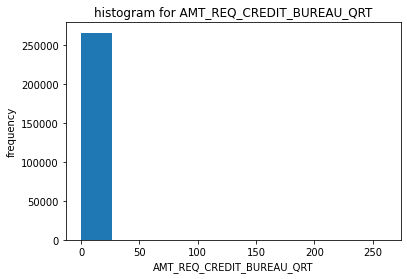

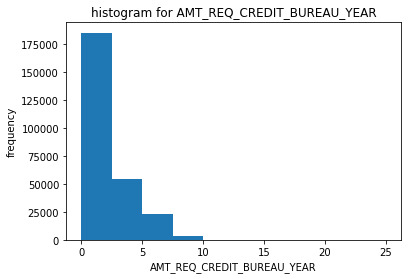

In [ ]:
for column in cont_col:
    insight_continuous(column)

In [ ]:
#doing for previous application features
threshold=10
cont_col_p=[]
disc_col_p=[]
for column in df_p.columns:
  if len(df_p[column].unique())>threshold:
    cont_col_p.append(column)
  else:
    disc_col_p.append(column)

print('*'*80)
print(f"continuous columns:\n{cont_col_p}")
print('*'*80)
print(f" discrete columns:\n {disc_col_p}")

********************************************************************************
continuous columns:
['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'DAYS_DECISION', 'NAME_GOODS_CATEGORY', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
********************************************************************************
 discrete columns:
 ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_YIELD_GROUP', 'NFLAG_INSURED_ON_APPROVAL']


In [ ]:
print("Removing unwanted column")
print(cont_col_p.pop(0))
print(cont_col_p.pop(0))


Removing unwanted column
SK_ID_PREV
SK_ID_CURR


In [ ]:
def insight_discrete(column):
  print(f"Percentage with respect to {column}")
  indexs=df_p[column].value_counts().index
  values=round(df_p[column].value_counts()/len(df_p[column]),2)
  [print(element) for element in list(zip(indexs,values))]
  print("\n\n")
  return 0
for column in disc_col_p:
    insight_discrete(column)

Percentage with respect to NAME_CONTRACT_TYPE
('Cash loans', 0.45)
('Consumer loans', 0.44)
('Revolving loans', 0.12)
('XNA', 0.0)



Percentage with respect to WEEKDAY_APPR_PROCESS_START
('TUESDAY', 0.15)
('WEDNESDAY', 0.15)
('MONDAY', 0.15)
('FRIDAY', 0.15)
('THURSDAY', 0.15)
('SATURDAY', 0.14)
('SUNDAY', 0.1)



Percentage with respect to FLAG_LAST_APPL_PER_CONTRACT
('Y', 0.99)
('N', 0.01)



Percentage with respect to NFLAG_LAST_APPL_IN_DAY
(1, 1.0)
(0, 0.0)



Percentage with respect to NAME_CONTRACT_STATUS
('Approved', 0.62)
('Canceled', 0.19)
('Refused', 0.17)
('Unused offer', 0.02)



Percentage with respect to NAME_PAYMENT_TYPE
('Cash through the bank', 0.62)
('XNA', 0.38)
('Non-cash from your account', 0.0)
('Cashless from the account of the employer', 0.0)



Percentage with respect to CODE_REJECT_REASON
('XAP', 0.81)
('HC', 0.1)
('LIMIT', 0.03)
('SCO', 0.02)
('CLIENT', 0.02)
('SCOFR', 0.01)
('XNA', 0.0)
('VERIF', 0.0)
('SYSTEM', 0.0)



Percentage with respect to NAME_TYPE_

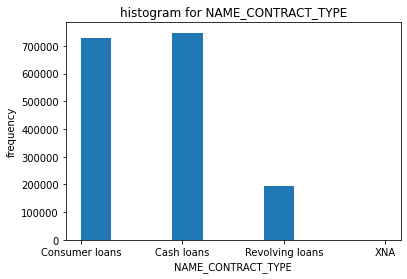

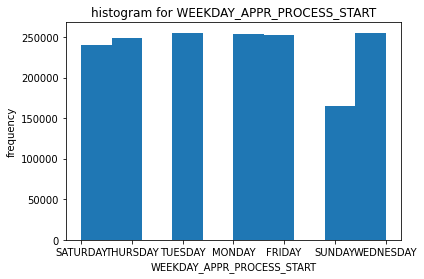

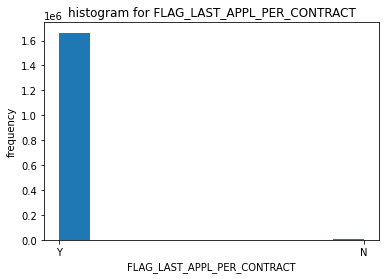

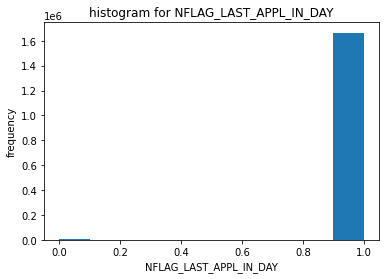

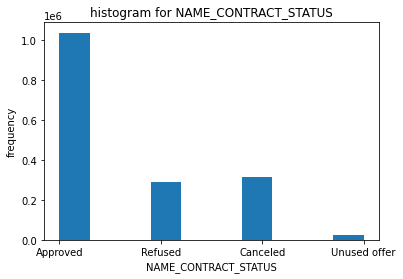

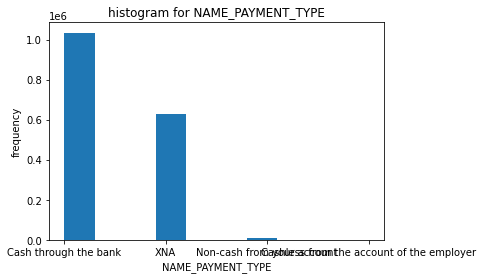

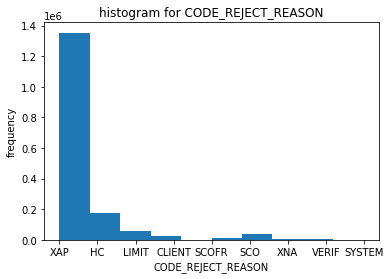

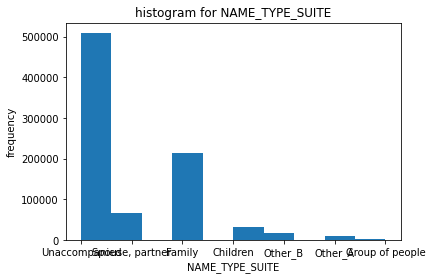

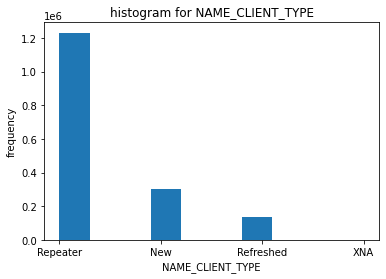

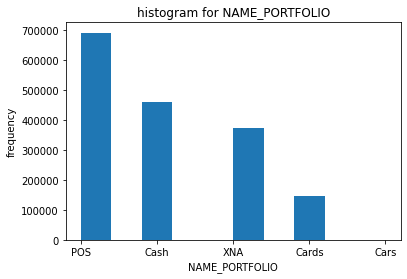

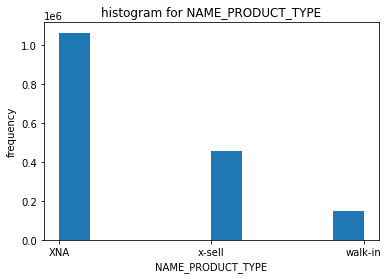

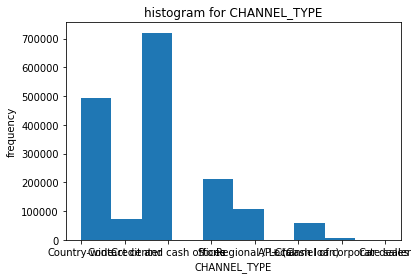

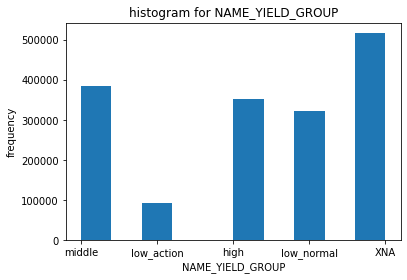

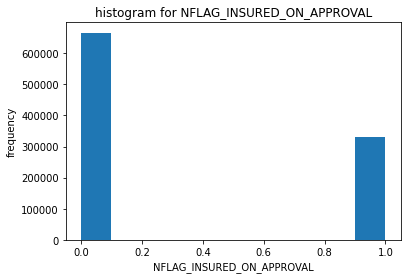

In [ ]:
def insight_continuous(column):
 
  plt.hist(df_p[column].dropna())
  plt.title(f"histogram for {column}")
  plt.xlabel(column)
  plt.ylabel("frequency")
  plt.show()
  print('\n\n')
  return 0

for column in disc_col_p:
  insight_continuous(column)